In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

In [2]:
#import data

train = pd.read_csv('D://dataset//titanic//train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
print('check null of each column')
train.isnull().sum()

check null of each column


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train['Pclass'].value_counts()

# 3 is the most

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [8]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
train.groupby(['Sex','Survived'])['Survived'].count()

# female = more survived , male = more died

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [10]:
train.groupby(['Pclass','Survived'])['Survived'].count()

# lower class = more died

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [11]:
train.groupby(['Embarked','Survived'])['Survived'].count()

# S,Q = more died

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

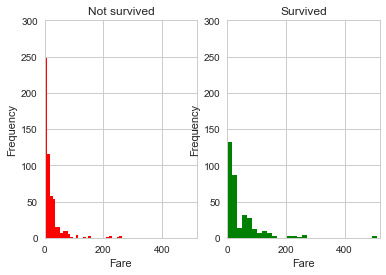

In [12]:
plt.subplot(121)
plt.hist(train[train.Survived==0]['Fare'],color='r',bins=30)
plt.xlim(0,520)
plt.ylim(0,300)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Not survived')

plt.subplot(122)
plt.hist(train[train.Survived==1]['Fare'],color='g',bins=30)
plt.xlim(0,520)
plt.ylim(0,300)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Survived')

plt.show()
#more fare = more survive

In [13]:
train.loc[train['Fare']>200]['Survived'].value_counts()

#more fare = more survive

1    14
0     6
Name: Survived, dtype: int64

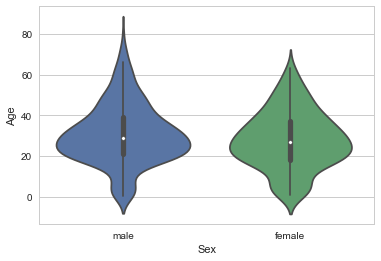

In [14]:
sns.violinplot(x='Sex',y='Age',data=train)
plt.show()

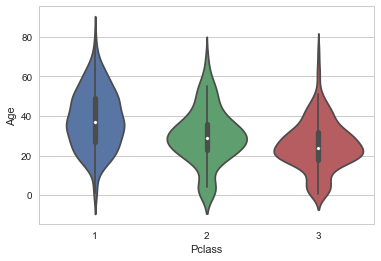

In [15]:
sns.violinplot(x='Pclass',y='Age',data=train)
plt.show()

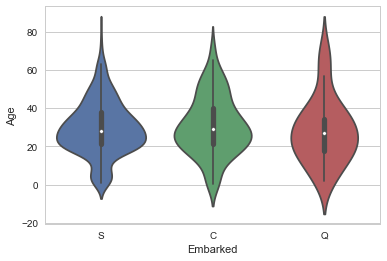

In [16]:
sns.violinplot(x='Embarked',y='Age',data=train)
plt.show()

In [17]:
train.groupby(['Sex'])['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

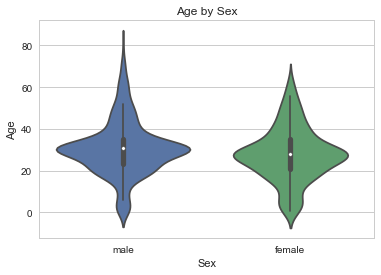

In [18]:
# fill missing age by sex

train['Age'] = train.Age.fillna(train.groupby('Sex')['Age'].transform('mean'))
sns.violinplot(x='Sex',y='Age',data=train)
plt.title('Age by Sex')
plt.show()

In [19]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
train[train.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [21]:
train.groupby(['Sex','Embarked'])['Embarked'].count()

Sex     Embarked
female  C            73
        Q            36
        S           203
male    C            95
        Q            41
        S           441
Name: Embarked, dtype: int64

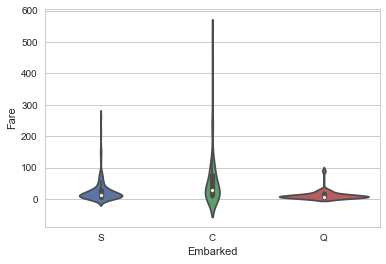

In [22]:
sns.violinplot(x='Embarked',y='Fare',data=train)
plt.show()

In [23]:
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [24]:
train['Embarked'] = train['Embarked'].fillna('C')

In [25]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [26]:
train.drop(['PassengerId','Cabin','Ticket'],axis=1,inplace=True)

In [27]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [28]:
temp = list()
for name in train.Name.values.tolist():
    for x in name.split()[1:]:
        if x[-1]=='.':
            temp.append(x)
            break

In [29]:
pd.Series(temp).value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Mlle.          2
Col.           2
Sir.           1
Capt.          1
Lady.          1
Jonkheer.      1
Countess.      1
Don.           1
Ms.            1
Mme.           1
dtype: int64

In [30]:
train['Name'] = temp
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Mr.,male,22.0,1,0,7.2500,S
1,1,1,Mrs.,female,38.0,1,0,71.2833,C
2,1,3,Miss.,female,26.0,0,0,7.9250,S
3,1,1,Mrs.,female,35.0,1,0,53.1000,S
4,0,3,Mr.,male,35.0,0,0,8.0500,S


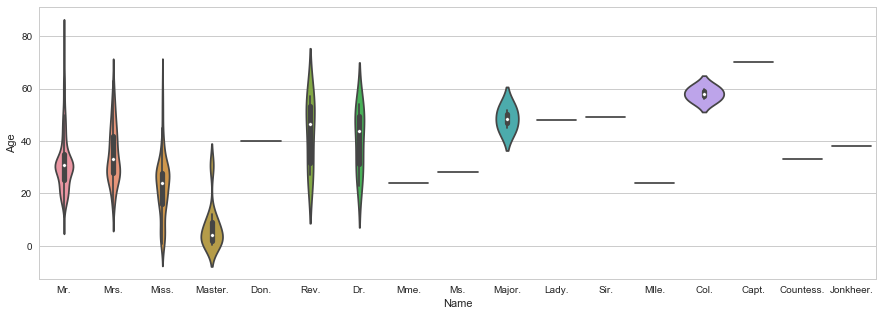

In [31]:
plt.figure(figsize=(15,5))
sns.violinplot(x='Name',y='Age',data=train)

In [32]:
train.groupby(['Name','Survived'])['Survived'].count()

Name       Survived
Capt.      0             1
Col.       0             1
           1             1
Countess.  1             1
Don.       0             1
Dr.        0             4
           1             3
Jonkheer.  0             1
Lady.      1             1
Major.     0             1
           1             1
Master.    0            17
           1            23
Miss.      0            55
           1           127
Mlle.      1             2
Mme.       1             1
Mr.        0           436
           1            81
Mrs.       0            26
           1            99
Ms.        1             1
Rev.       0             6
Sir.       1             1
Name: Survived, dtype: int64

In [33]:
#One hot (Name)
train['Name_Dr'] = [1 if x=='Dr.' else 0 for x in train['Name'].values.tolist()]
train['Name_Master'] = [1 if x=='Master.' else 0 for x in train['Name'].values.tolist()]
train['Name_Mlle'] = [1 if x=='Mlle.' else 0 for x in train['Name'].values.tolist()]
train['Name_Mme'] = [1 if x=='Mme.' else 0 for x in train['Name'].values.tolist()]
train['Name_Rev'] = [1 if x=='Rev.' else 0 for x in train['Name'].values.tolist()]
train['Name_Sir'] = [1 if x=='Sir.' else 0 for x in train['Name'].values.tolist()]

In [34]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Name_Dr,Name_Master,Name_Mlle,Name_Mme,Name_Rev,Name_Sir
0,0,3,Mr.,male,22.0,1,0,7.2500,S,0,0,0,0,0,0
1,1,1,Mrs.,female,38.0,1,0,71.2833,C,0,0,0,0,0,0
2,1,3,Miss.,female,26.0,0,0,7.9250,S,0,0,0,0,0,0
3,1,1,Mrs.,female,35.0,1,0,53.1000,S,0,0,0,0,0,0
4,0,3,Mr.,male,35.0,0,0,8.0500,S,0,0,0,0,0,0


In [35]:
train['Sex'] = [1 if x=='male' else 0 for x in train['Sex'].values.tolist()]

# male = 1 , female = 0

In [36]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Name_Dr,Name_Master,Name_Mlle,Name_Mme,Name_Rev,Name_Sir
0,0,3,Mr.,1,22.0,1,0,7.2500,S,0,0,0,0,0,0
1,1,1,Mrs.,0,38.0,1,0,71.2833,C,0,0,0,0,0,0
2,1,3,Miss.,0,26.0,0,0,7.9250,S,0,0,0,0,0,0
3,1,1,Mrs.,0,35.0,1,0,53.1000,S,0,0,0,0,0,0
4,0,3,Mr.,1,35.0,0,0,8.0500,S,0,0,0,0,0,0


In [37]:
train.drop(['Name'],axis=1,inplace=True)

In [38]:
train['SP'] = train.SibSp + train.Parch
train.drop(['SibSp','Parch'],axis=1,inplace=True)

In [39]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Name_Dr,Name_Master,Name_Mlle,Name_Mme,Name_Rev,Name_Sir,SP
0,0,3,1,22.0,7.2500,S,0,0,0,0,0,0,1
1,1,1,0,38.0,71.2833,C,0,0,0,0,0,0,1
2,1,3,0,26.0,7.9250,S,0,0,0,0,0,0,0
3,1,1,0,35.0,53.1000,S,0,0,0,0,0,0,1
4,0,3,1,35.0,8.0500,S,0,0,0,0,0,0,0


In [40]:
train.groupby(['Embarked','Sex','Survived'])['Survived'].count()

Embarked  Sex  Survived
C         0    0             9
               1            66
          1    0            66
               1            29
Q         0    0             9
               1            27
          1    0            38
               1             3
S         0    0            63
               1           140
          1    0           364
               1            77
Name: Survived, dtype: int64

In [41]:
# One hot (Embarked)
train['Embarked_C'] = [1 if x=='C' else 0 for x in train['Embarked'].values.tolist()]
train['Embarked_Q'] = [1 if x=='Q' else 0 for x in train['Embarked'].values.tolist()]
train['Embarked_S'] = [1 if x=='S' else 0 for x in train['Embarked'].values.tolist()]
train.drop(['Embarked'],axis=1,inplace=True)
train.head()

,Survived,Pclass,Sex,Age,Fare,Name_Dr,Name_Master,Name_Mlle,Name_Mme,Name_Rev,Name_Sir,SP,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,7.2500,0,0,0,0,0,0,1,0,0,1
1,1,1,0,38.0,71.2833,0,0,0,0,0,0,1,1,0,0
2,1,3,0,26.0,7.9250,0,0,0,0,0,0,0,0,0,1
3,1,1,0,35.0,53.1000,0,0,0,0,0,0,1,0,0,1
4,0,3,1,35.0,8.0500,0,0,0,0,0,0,0,0,0,1


In [43]:
use_feature = ['Sex','Pclass','Fare']

df = train[use_feature]
df.head()

,Sex,Pclass,Fare
0,1,3,7.2500
1,0,1,71.2833
2,0,3,7.9250
3,0,1,53.1000
4,1,3,8.0500


In [44]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from keras.models import Sequential
from keras.layers import Dense

C:\Users\Nop\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [54]:
kf = KFold(n_splits=10) # Define the split - into 5 folds
print(kf)

KFold(n_splits=10, random_state=None, shuffle=False)


In [55]:
X = df.values
y = train.Survived.values

In [56]:
# 5 fold Logistic Regression
hit = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    log_reg = LogisticRegression()
    log_reg.fit(X_train,y_train)
    predict = log_reg.predict(X_test)
    
    for y_pred,y_real in zip(predict.tolist(),y_test.tolist()):
        if y_pred == y_real:
            hit += 1

print("Accuracy: ",hit/df.shape[0])

Accuracy:  0.7822671156004489


In [90]:
# 5 fold K nearest neighbours
hit = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    knn = KNeighborsClassifier(n_neighbors=7)
    knn.fit(X_train,y_train)
    predict = knn.predict(X_test)
    
    for y_pred,y_real in zip(predict.tolist(),y_test.tolist()):
        if y_pred == y_real:
            hit += 1

print("Accuracy: ",hit/df.shape[0])

Accuracy:  0.7833894500561167


In [58]:
# 5 fold support vector machine (linear)
hit = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    sup_vec_mac = SVC(kernel='linear')
    sup_vec_mac.fit(X_train,y_train)
    predict = sup_vec_mac.predict(X_test)
    
    for y_pred,y_real in zip(predict.tolist(),y_test.tolist()):
        if y_pred == y_real:
            hit += 1

print("Accuracy: ",hit/df.shape[0])

Accuracy:  0.7867564534231201


In [59]:
# 5 fold support vector machine (RBF)
hit = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    sup_vec_mac = SVC()
    sup_vec_mac.fit(X_train,y_train)
    predict = sup_vec_mac.predict(X_test)
    
    for y_pred,y_real in zip(predict.tolist(),y_test.tolist()):
        if y_pred == y_real:
            hit += 1

print("Accuracy: ",hit/df.shape[0])

Accuracy:  0.7800224466891134


In [60]:
# 5 fold Linear SVC
hit = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lin_sup = LinearSVC()
    lin_sup.fit(X_train,y_train)
    predict = lin_sup.predict(X_test)
    
    for y_pred,y_real in zip(predict.tolist(),y_test.tolist()):
        if y_pred == y_real:
            hit += 1

print("Accuracy: ",hit/df.shape[0])

Accuracy:  0.7609427609427609


In [61]:
# 5 fold Naive Bayes (Gaussian)
hit = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    gnb = GaussianNB()
    gnb.fit(X_train,y_train)
    predict = gnb.predict(X_test)
    
    for y_pred,y_real in zip(predict.tolist(),y_test.tolist()):
        if y_pred == y_real:
            hit += 1

print("Accuracy: ",hit/df.shape[0])

Accuracy:  0.7777777777777778


In [76]:
# 5 fold NN
hit = 0
i = 1
for train_index, test_index in kf.split(X):
    print('Fold: ',i)
    i+=1
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # create model
    model = Sequential()
    model.add(Dense(50, input_dim=3, init='uniform', activation='sigmoid'))
    model.add(Dense(1, input_dim=50, init='uniform', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Fit the model
    model.fit(X_train, y_train, epochs=100, batch_size=1,  verbose=0)
    # calculate predictions
    predict = model.predict(X_test)
    predict[predict>=0.5]=1
    predict[predict<0.5]=0
    predict = predict.astype('int64')
    temp = []
    for t in predict.tolist():
        temp += t
    
    for y_pred,y_real in zip(temp,y_test.tolist()):
        if y_pred == y_real:
            hit += 1

print("Accuracy: ",hit/df.shape[0])

Fold:  1


C:\Users\Nop\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, input_dim=3, activation="sigmoid", kernel_initializer="uniform")`
  if sys.path[0] == '':
C:\Users\Nop\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, input_dim=50, activation="sigmoid", kernel_initializer="uniform")`
  del sys.path[0]


Fold:  2


C:\Users\Nop\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, input_dim=3, activation="sigmoid", kernel_initializer="uniform")`
  if sys.path[0] == '':
C:\Users\Nop\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, input_dim=50, activation="sigmoid", kernel_initializer="uniform")`
  del sys.path[0]


Fold:  3


C:\Users\Nop\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, input_dim=3, activation="sigmoid", kernel_initializer="uniform")`
  if sys.path[0] == '':
C:\Users\Nop\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, input_dim=50, activation="sigmoid", kernel_initializer="uniform")`
  del sys.path[0]


Fold:  4


C:\Users\Nop\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, input_dim=3, activation="sigmoid", kernel_initializer="uniform")`
  if sys.path[0] == '':
C:\Users\Nop\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, input_dim=50, activation="sigmoid", kernel_initializer="uniform")`
  del sys.path[0]


Fold:  5


C:\Users\Nop\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, input_dim=3, activation="sigmoid", kernel_initializer="uniform")`
  if sys.path[0] == '':
C:\Users\Nop\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, input_dim=50, activation="sigmoid", kernel_initializer="uniform")`
  del sys.path[0]


Fold:  6


C:\Users\Nop\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, input_dim=3, activation="sigmoid", kernel_initializer="uniform")`
  if sys.path[0] == '':
C:\Users\Nop\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, input_dim=50, activation="sigmoid", kernel_initializer="uniform")`
  del sys.path[0]


Fold:  7


C:\Users\Nop\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, input_dim=3, activation="sigmoid", kernel_initializer="uniform")`
  if sys.path[0] == '':
C:\Users\Nop\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, input_dim=50, activation="sigmoid", kernel_initializer="uniform")`
  del sys.path[0]


Fold:  8


C:\Users\Nop\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, input_dim=3, activation="sigmoid", kernel_initializer="uniform")`
  if sys.path[0] == '':
C:\Users\Nop\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, input_dim=50, activation="sigmoid", kernel_initializer="uniform")`
  del sys.path[0]


Fold:  9


C:\Users\Nop\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, input_dim=3, activation="sigmoid", kernel_initializer="uniform")`
  if sys.path[0] == '':
C:\Users\Nop\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, input_dim=50, activation="sigmoid", kernel_initializer="uniform")`
  del sys.path[0]


Fold:  10


C:\Users\Nop\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, input_dim=3, activation="sigmoid", kernel_initializer="uniform")`
  if sys.path[0] == '':
C:\Users\Nop\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, input_dim=50, activation="sigmoid", kernel_initializer="uniform")`
  del sys.path[0]


Accuracy:  0.7957351290684624
